### p.355

In [6]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data
                        , columns = boston.feature_names
                        )



In [14]:
bostonDF['PRICE'] = boston.target

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

rf_R = RandomForestRegressor(random_state = 0
                           , n_estimators = 1000)

neg_mse_scores = cross_val_score(rf_R
                                , X_data
                                , y_target
                                , scoring = 'neg_mean_squared_error'
                                , cv = 5
                                )

rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(
f'''
Negative_MSE_Scores : {np.round(neg_mse_scores, 2)}
RMSE Scores : {np.round(rmse_scores, 2)}
avg_rmse : {avg_rmse:.4f}
''')


Negative_MSE_Scores : [ -7.88 -13.14 -20.57 -46.23 -18.88]
RMSE Scores : [2.81 3.63 4.54 6.8  4.34]
avg_rmse : 4.4225



In [17]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model
                                     , X_data
                                     , y_target
                                     , scoring = 'neg_mean_squared_error'
                                     , cv = 5
                                     )
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(
    f'''
    {model.__class__.__name__}
    ▶ 교차 검증의 평균
    {avg_rmse:.4f}
    ''')

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state = 0
                               , max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0
                               , n_estimators=1000
                               )

gb_reg = GradientBoostingRegressor(random_state= 0
                               , n_estimators = 1000
                               )

xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models :
    get_model_cv_prediction(model
                            , X_data
                            , y_target)


    DecisionTreeRegressor
    ▶ 교차 검증의 평균
    5.9780
    

    RandomForestRegressor
    ▶ 교차 검증의 평균
    4.4225
    

    GradientBoostingRegressor
    ▶ 교차 검증의 평균
    4.2690
    

    XGBRegressor
    ▶ 교차 검증의 평균
    4.2511
    

    LGBMRegressor
    ▶ 교차 검증의 평균
    4.6464
    


<AxesSubplot:xlabel='None', ylabel='None'>

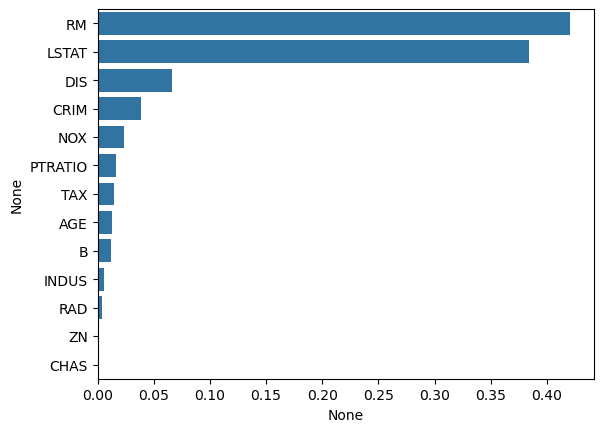

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000)
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_
                           , index = X_data.columns
                           )

feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y = feature_series.index)

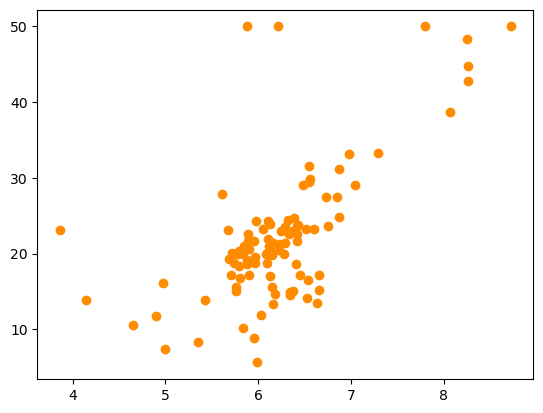

In [33]:
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n = 100
                                        , random_state = 0)

bostonDF_sample.shape
plt.figure()
plt.scatter(bostonDF_sample['RM']
            , bostonDF_sample['PRICE']
            , c = 'darkorange')